In [11]:
import pandas as pd

In [13]:
df = pd.read_excel("C:/Users/user/Desktop/gym_equp_data.xlsx")

In [15]:
import matplotlib.pyplot as plt

In [7]:
df.head()

,Category,Supplier,Brand,Year,Month,Profit (Month)
0,Treadmill,Peak Performance Gear,Apex Athletics,2018,1,13318
1,Treadmill,Peak Performance Gear,Apex Athletics,2018,2,12921
2,Treadmill,Peak Performance Gear,Apex Athletics,2018,3,13752
3,Treadmill,Peak Performance Gear,Apex Athletics,2018,4,13355
4,Treadmill,Peak Performance Gear,Apex Athletics,2018,5,12130


In [21]:
#convert month and year to date format

df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

#check the new column

print(df[['Date', 'Profit (Month)']].head())

        Date  Profit (Month)
0 2018-01-01           13318
1 2018-02-01           12921
2 2018-03-01           13752
3 2018-04-01           13355
4 2018-05-01           12130


In [23]:
#Group data by date to calculate total profit for each month

monthly_profit_trend = df.groupby('Date')['Profit (Month)'].sum().reset_index()

print(monthly_profit_trend.head())

        Date  Profit (Month)
0 2018-01-01          203207
1 2018-02-01          203996
2 2018-03-01          194351
3 2018-04-01          209882
4 2018-05-01          203784


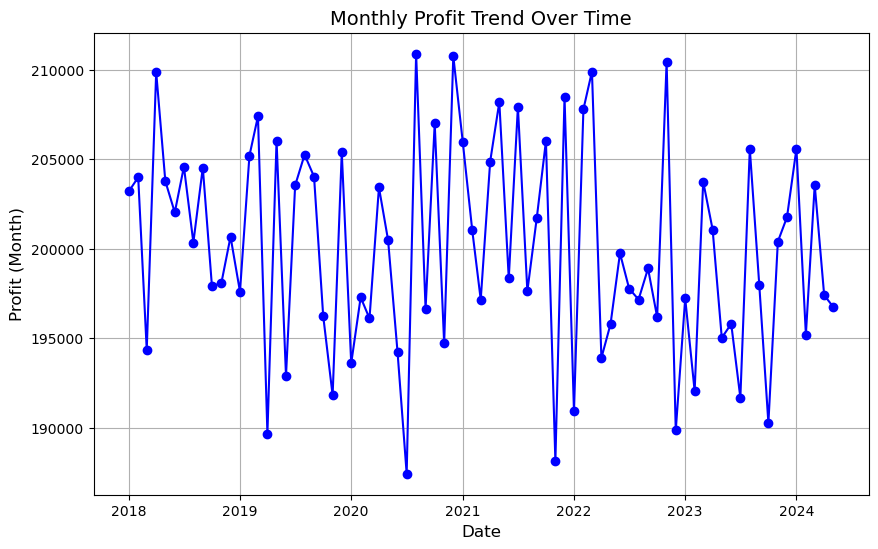

In [17]:
#monthly trend visual

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit_trend['Date'], monthly_profit_trend['Profit (Month)'], marker='o', linestyle='-', color='b')

# Adding labels and title
plt.title('Monthly Profit Trend Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Profit (Month)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

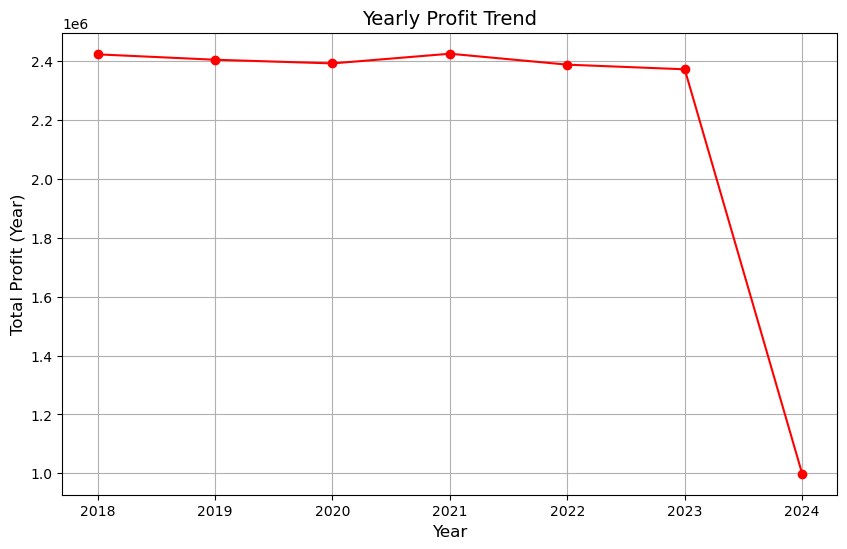

In [19]:
#analyze yearly trends

yearly_profit_trend = df.groupby('Year')['Profit (Month)'].sum().reset_index()

# Plot yearly profit trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_profit_trend['Year'], yearly_profit_trend['Profit (Month)'], marker='o', linestyle='-', color='r')
plt.title('Yearly Profit Trend', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Profit (Year)', fontsize=12)
plt.grid(True)
plt.show()


Observations from the visual:
1. The profits appear to be relatively constant between 2018 - 2023, dispalying minimal variations in total profits indicating a "Flat trend".

2. There shows a drastic drop in total profits for the year 2024, indicating a "Sharp decline".

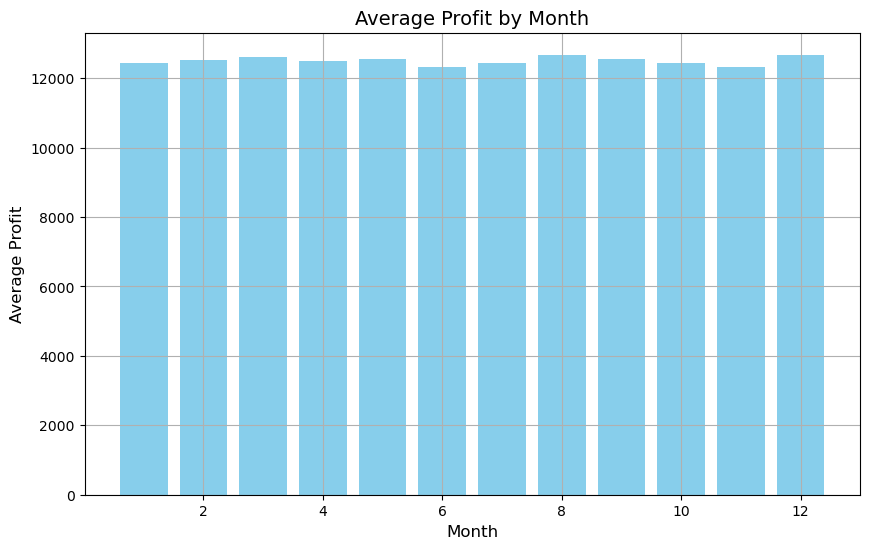

In [21]:
#analysing which months perform better or worse across the years.

monthly_avg_profit = df.groupby('Month')['Profit (Month)'].mean().reset_index()

# Plot average monthly profit trend
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_profit['Month'], monthly_avg_profit['Profit (Month)'], color='skyblue')
plt.title('Average Profit by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Profit', fontsize=12)
plt.grid(True)
plt.show()


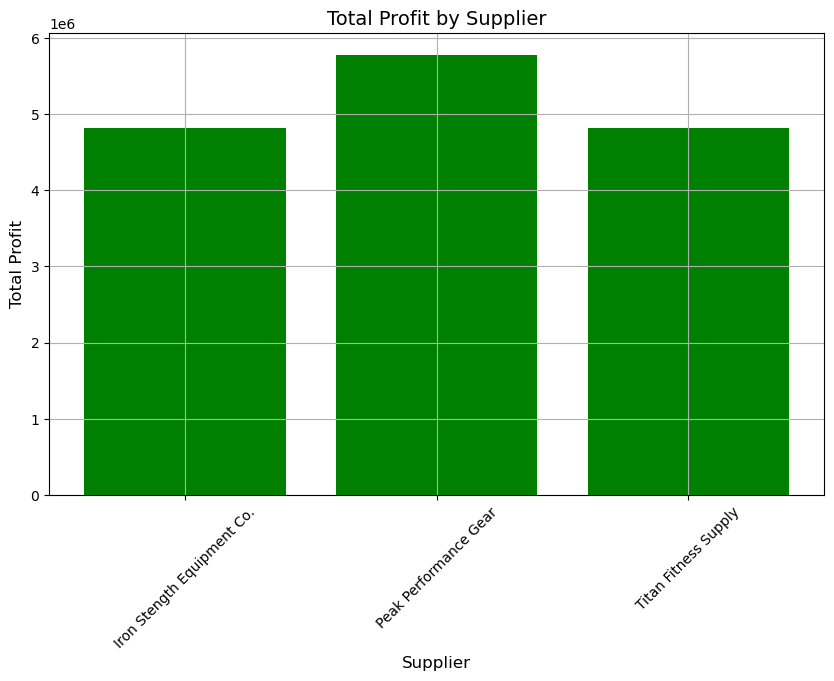

In [23]:
supplier_profit = df.groupby('Supplier')['Profit (Month)'].sum().reset_index()

# Plot profit per supplier
plt.figure(figsize=(10, 6))
plt.bar(supplier_profit['Supplier'], supplier_profit['Profit (Month)'], color='green')
plt.title('Total Profit by Supplier', fontsize=14)
plt.xlabel('Supplier', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [29]:
import seaborn as sns

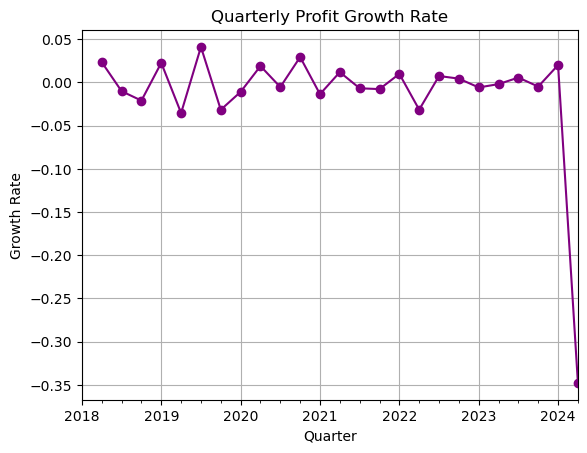

In [25]:
df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_growth = df.groupby('Quarter')['Profit (Month)'].sum().pct_change()
quarterly_growth.plot(kind='line', marker='o', color='purple')
plt.title('Quarterly Profit Growth Rate')
plt.xlabel('Quarter')
plt.ylabel('Growth Rate')
plt.grid(True)
plt.show()

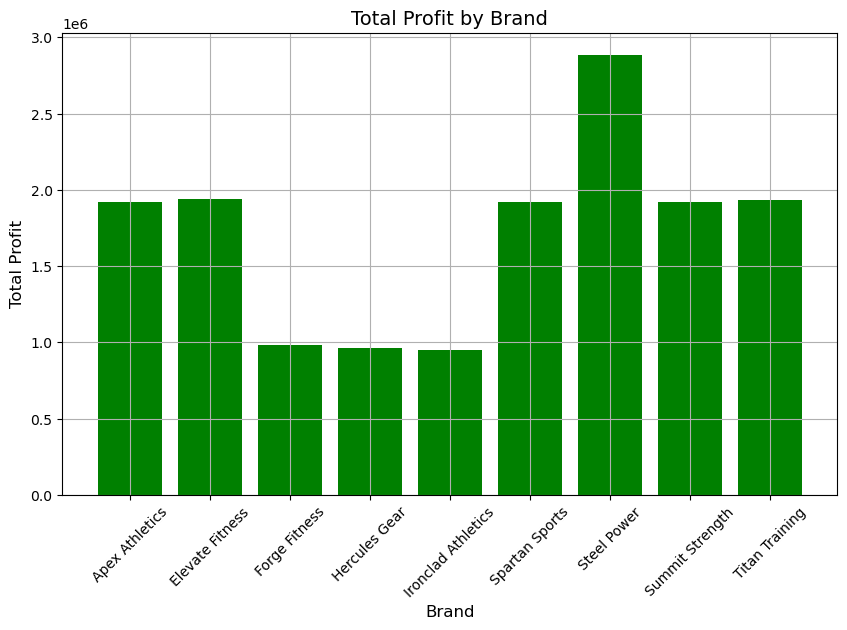

In [29]:
brand_profit = df.groupby('Brand')['Profit (Month)'].sum().reset_index()

# Plot profit per supplier
plt.figure(figsize=(10, 6))
plt.bar(brand_profit['Brand'], brand_profit['Profit (Month)'], color='green')
plt.title('Total Profit by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


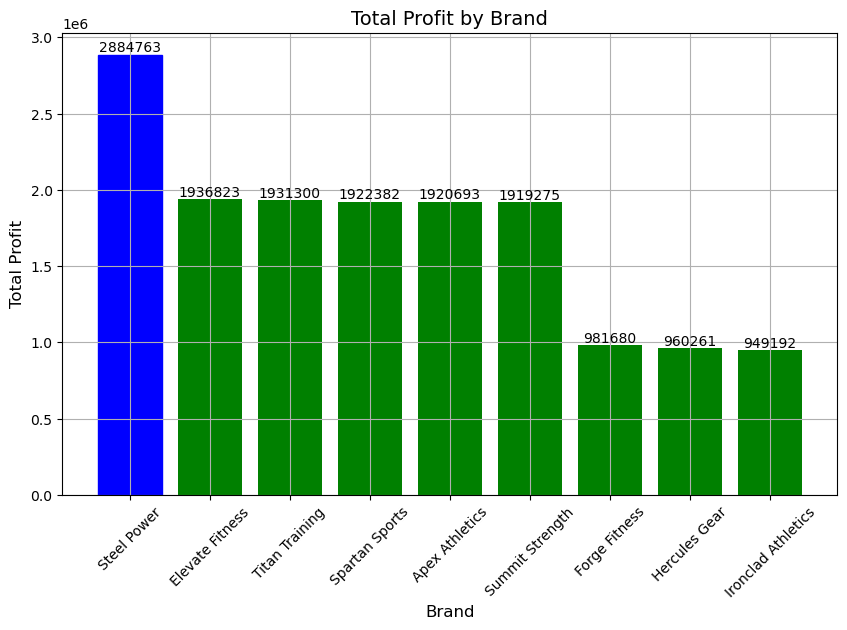

In [33]:
# Sort the data in descending order of profit
brand_profit_sorted = brand_profit.sort_values(by='Profit (Month)', ascending=False)

# Plot profit per supplier with sorted data
plt.figure(figsize=(10, 6))
bars = plt.bar(brand_profit_sorted['Brand'], brand_profit_sorted['Profit (Month)'], color='green')

# Highlight top brand with a different color
bars[0].set_color('blue')  # Set Steel Power to blue

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Titles and labels
plt.title('Total Profit by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
